### Install Networkx

In [ ]:
pip install networkx

### Initial Graph

( 1 , 2 )
( 1 , 2 )
( 2 , 3 )
( 2 , 4 )
( 2 , 3 )
( 2 , 4 )
( 3 , 1 )
( 4 , 5 )
( 4 , 5 )
( 5 , 4 )


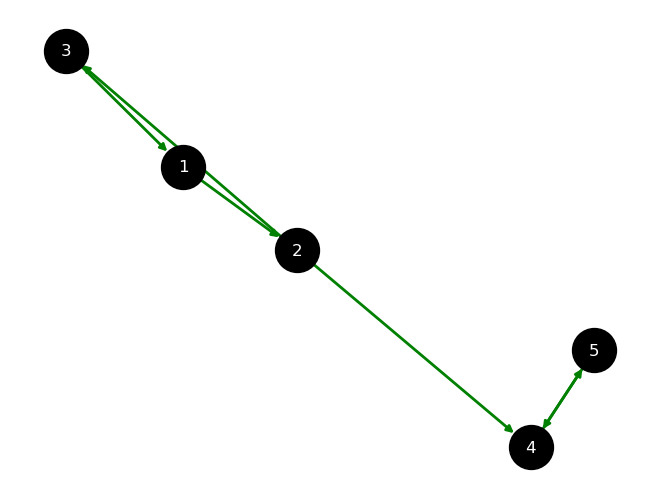

In [17]:
from graph import Graph, Tarjan
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

g = Graph()
for i in range(6):
    g.addVertex(i)
    g.addEdge(1,2,5)
    g.addEdge(2,3,2)
    g.addEdge(3,1,2)
    g.addEdge(2,4,6)
    g.addEdge(5,4,7)
    g.addEdge(4,5,7)
for v in g:
    for w in v.getConnections():
        print("( %s , %s )" % (v.getId(), w.getId()))


# Visual graph
G1 = nx.DiGraph()
for v in g:
    for w in v.getConnections():
        G1.add_edge(v.getId(), w.getId())

pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_size=1000, node_color='black', font_color='white', edge_color ='green', width = 2, with_labels= True)

In [26]:
class Tarjan1():
    """ 
        Class TarjanGraph
        Apply Tarjan algorithm to 
    """
    def __init__(self, graph):
        super().__init__()
        self.graph = graph
        self.index = 0
        self.stack = []
        self.indexes = {}
        self.lowlinks = {}
        self.answer = []

    def setup(self):
        for v in self.graph:
            if v != None:
                self.indexes[v.id] = None
                self.lowlinks[v.id] = None

    def run(self):
        for v in self.graph.getVertices():
            vertex = self.graph.getVertex(v)
            if vertex != None:
                if self.indexes[vertex.id] == None:
                    self.SCC(vertex)

    def FindInSCC(self, element):
        for scc in self.answer:
            if element in scc:
                return scc[0]
    
    def SCC(self, v):
        self.indexes[v.id] = self.index
        self.lowlinks[v.id] = self.index
        self.index += 1
        self.stack.append(v)
        SCComp = []

        for w in v.getConnections():
            if self.indexes[w.id] == None:
                self.SCC(w)
                self.lowlinks[v.id] = min(self.lowlinks[v.id], self.lowlinks[w.id])
            elif w in self.stack:
                self.lowlinks[v.id] = min(self.lowlinks[v.id], self.indexes[w.id])
        
        if self.lowlinks[v.id] == self.indexes[v.id]:
            w = None
            while w == None or w.id != v.id:
                w = self.stack.pop()
                SCComp.append(w)
        if SCComp != [] and SCComp not in self.answer:
            # SCComp.sort()
            self.answer.append(SCComp)

    def GetFinalAnswer(self):
        FinalAnswer = {}
        for answer in self.answer:
            for element in answer:
                destinations = element.getConnections()
                for destination in destinations:
                    findElement = self.FindInSCC(element)
                    if findElement not in FinalAnswer:
                        FinalAnswer[findElement.id] = []

                    findDestination = self.FindInSCC(destination)
                    if findDestination != [] and findDestination != findElement:
                        if findDestination not in FinalAnswer[findElement.id]:
                            FinalAnswer[findElement.id].append(findDestination)

        #R
        print(len(self.answer))
        print(self.answer)
        
        #L
        connections = 0
        for element in FinalAnswer:
            connections += len(FinalAnswer[element])
        print(connections)

        for key in sorted (FinalAnswer.keys()):
            FinalAnswer[key].sort()
            for element in FinalAnswer[key]:
                print(f'{key} {element}') 

In [27]:
tarj = Tarjan1(g)
tarj.setup()
tarj.run()
tarj.GetFinalAnswer()

3
[[0], [5, 4], [3, 2, 1]]
1
3 None
